In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import time
import random as rd
from pathlib import Path
from tqdm import tqdm


In [2]:
# coeficiente de variacion 
cv = lambda x: np.std(x, ddof = 1) / np.mean(x) #zz* 100

In [3]:
def invoc_per_func(ruta = Path.cwd()):
    return  [arch.name for arch in Path(ruta).glob('invocations_per_function_md.anon.d[01][0-9].csv')]

invoc_func = invoc_per_func() 

In [6]:
# recorre invocations_per_function_md.anon para saber el promedio de veces que se invoca cada funcion en los 14 dias 
def add_days():
    invoc_per_func= pd.DataFrame()
    with tqdm(total=len(invoc_func), file=sys.stdout) as pbar:
        cont_arch = 0
        invoc_per_func = pd.read_csv("invocations_per_function_md.anon.d01.csv")
        cont_arch = 1
        for arch in invoc_func:
            if(arch == "invocations_per_function_md.anon.d01.csv"):
                invoc_per_func["ivocationDay"] = invoc_per_func.iloc[:, 4:].sum(axis=1)
                invoc_per_func = invoc_per_func[["HashFunction", "Trigger", "ivocationDay"]]
                pbar.update(1)
                continue                                           
            else:
                aux = pd.read_csv(arch)
                aux["ivocationDay"] = aux.iloc[:, 4:].sum(axis=1)
                aux = aux[["HashFunction", "Trigger", "ivocationDay"]]

                invoc_per_func = invoc_per_func.merge(aux, on=['HashFunction','Trigger'], how='outer',suffixes=("_"+str(cont_arch), "_"+str(cont_arch+1)))
                cont_arch+=1
                aux = pd.DataFrame()
            pbar.set_description('procesando archivo %d' %(cont_arch))
            pbar.update(1)
            
        #invoc_per_func["InvocationsDays"] = invoc_per_func.iloc[:, 2:].mean(axis =1)
        #invoc_per_func = invoc_per_func[["HashFunction", "Trigger", "InvocationsDays"]]
        #invoc_per_func

    return invoc_per_func

In [7]:
aux=add_days()

procesando archivo 14: 100%|███████████████████████████████████████████████████████████| 14/14 [01:38<00:00,  7.02s/it]


In [8]:
#aux tiene el numero de invocaciones de un afuncion por dia
aux = aux.fillna(0)
aux

,HashFunction,Trigger,ivocationDay_1,ivocationDay_2,ivocationDay_3,ivocationDay_4,ivocationDay_5,ivocationDay_6,ivocationDay_7,ivocationDay_8,ivocationDay_9,ivocationDay_10,ivocationDay_11,ivocationDay_12,ivocationDay_13,ivocationDay_14
0,520dbd6bd906840012aa0c4b778743efc7c0ac7b7caf96...,http,288.0,288.0,287.0,288.0,288.0,288.0,288.0,289.0,288.0,289.0,288.0,288.0,288.0,288.0
1,115ca7a2b5bc290052c3da74cd0347d19c3c67b7d5aa66...,http,288.0,288.0,287.0,288.0,288.0,288.0,287.0,288.0,288.0,288.0,288.0,288.0,288.0,288.0
2,93e6c664773bbec3a7f50a0e92fa7e97401a802dc6eed8...,orchestration,10.0,6.0,7.0,26.0,21.0,4.0,2.0,9.0,1.0,8.0,6.0,1.0,2.0,0.0
3,740c5c767e4b9978ee59a97d1829cfbaf755a47806a311...,http,11.0,6.0,7.0,22.0,23.0,1.0,3.0,11.0,3.0,3.0,2.0,0.0,0.0,0.0
4,c108b4864b866b38b80d0e4594cc6d038f39668b804a1b...,http,9.0,7.0,9.0,27.0,14.0,6.0,3.0,16.0,1.0,2.0,8.0,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74342,4795a4eddf26cca87a5c7c1de760fc1beefd16f866c197...,http,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
74343,75e947006f189b6cce5c6516975142f29a0f169e764fde...,storage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
74344,11b3d8753f8f707b77c23063fb9cc9cfe9c74b40f9ab8c...,storage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
74345,42212390028151a3ab9918fd440633957a4b3b8bd3e679...,storage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [10]:
allDay = aux.copy()
allDay["InvocationsDays"] = allDay.iloc[:, 2:].sum(axis =1)
allDay = allDay[["HashFunction", "Trigger", "InvocationsDays"]]
allDay

,HashFunction,Trigger,InvocationsDays
0,520dbd6bd906840012aa0c4b778743efc7c0ac7b7caf96...,http,4033.0
1,115ca7a2b5bc290052c3da74cd0347d19c3c67b7d5aa66...,http,4030.0
2,93e6c664773bbec3a7f50a0e92fa7e97401a802dc6eed8...,orchestration,103.0
3,740c5c767e4b9978ee59a97d1829cfbaf755a47806a311...,http,92.0
4,c108b4864b866b38b80d0e4594cc6d038f39668b804a1b...,http,106.0
...,...,...,...
74342,4795a4eddf26cca87a5c7c1de760fc1beefd16f866c197...,http,1.0
74343,75e947006f189b6cce5c6516975142f29a0f169e764fde...,storage,2.0
74344,11b3d8753f8f707b77c23063fb9cc9cfe9c74b40f9ab8c...,storage,1.0
74345,42212390028151a3ab9918fd440633957a4b3b8bd3e679...,storage,2.0


In [11]:
#data frmae con defcha/hora/min   y numero de invocaciones totales recibidos por la plataforma en ese min
#hora  invocaciones 
inv_min = pd.read_csv(r"C:\Users\robin\Documents\dataset_Metodologia\Invocations_per_1Min.csv")

In [12]:

#para comprobar si el numero de invocaciones coinciden en ambos DF
print("Total de funciones ", allDay['HashFunction'].count())
if(inv_min['invocaciones'].sum() == allDay['InvocationsDays'].sum()):
    print("total de invocaciones recibidas en la plataforma ", allDay['InvocationsDays'].sum())

Total de funciones  74347
total de invocaciones recibidas en la plataforma  12495810846.0


# graficas y resolucion de preguntas

Tipos de Trigger y su presencia en % dentro del total de invocaicones

Trigger
  http             40.943145
timer            27.000417
queue            14.258813
orchestration     7.748800
others            5.377487
event             2.500437
storage           2.170901
Name: Trigger, dtype: float64


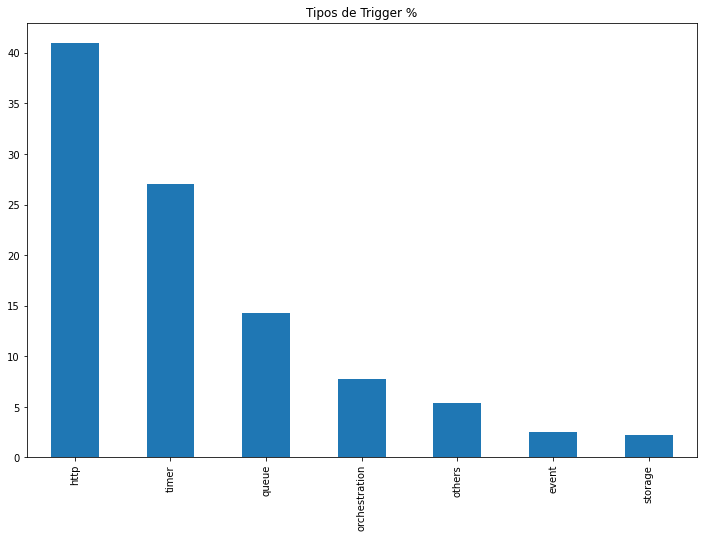

In [13]:
# porcentajes de Tipo de funciones y su contribucion al total,   Preguntas 2 y 4
#¿Qué porcentaje de las funciones constituyen aquellas que tienen trigger timer?
#¿Qué porcentaje de las funciones tienen trigger HTTP?

# gráfico de barras de frecuencias relativas.
plot = (100 * allDay['Trigger'].value_counts() / len(allDay['Trigger'])).plot(
kind='bar', title='Tipos de Trigger %',  figsize=[12,8])

print("Tipos de Trigger y su presencia en % dentro del total de invocaicones\n\nTrigger\n ", 
      100 * allDay['Trigger'].value_counts() / len(allDay['Trigger'] ))


¿Qué porcentaje de las funciones constituyen aquellas que tienen trigger timer?
¿Qué porcentaje de las funciones tienen trigger HTTP?

Para Ambas preguntas antes planteadas las respuestas son las siguientes, los trigger timer y http constituyen un 27% y  40.94% siendo la presencia de triggers de tipo http la de mayor aporte dentro de todos los tipos de trigger, seguidos de los trigger tipo timer. Lo cual deja con un presencia del 32% a los otros tipos de trigger. 


porcentaje de invocacion en tipo de Trigger

 Trigger
event            30.931048
http             22.503750
orchestration     1.400713
others            0.121839
queue            42.436373
storage           0.782284
timer             1.823993
Name: InvocationsDays, dtype: float64


porcentaje de invocacion en tipo de Trigger

 Trigger
event            30.931048
http             22.503750
orchestration     1.400713
others            0.121839
queue            42.436373
storage           0.782284
timer             1.823993
Name: InvocationsDays, dtype: float64


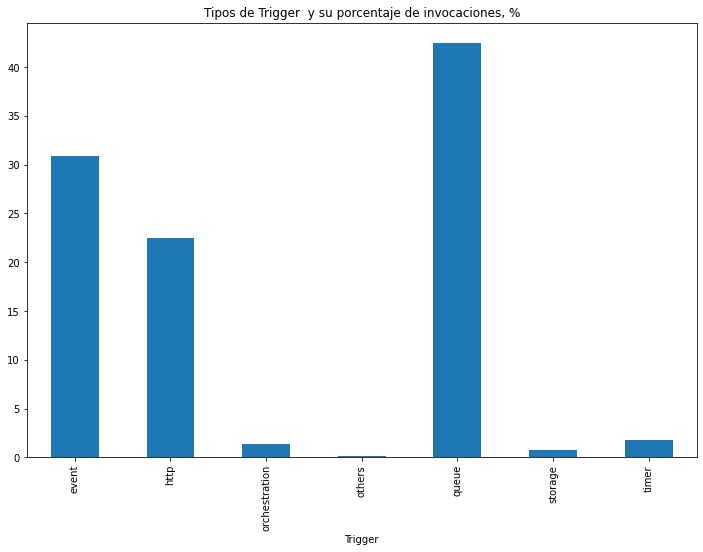

In [41]:
# porcentajes de invocaciones Tipo de funciones y su contribucion al total,   preguntas 3 y 5
# gráfico de barras de frecuencias relativas.
plot = (100*allDay.groupby('Trigger')['InvocationsDays'].sum() / allDay['InvocationsDays'].sum()).plot(
kind='bar', title='Tipos de Trigger  y su porcentaje de invocaciones, %',  figsize=[12,8])
print("porcentaje de invocacion en tipo de Trigger\n\n",(100*allDay.groupby('Trigger')['InvocationsDays'].sum() / allDay['InvocationsDays'].sum()))

Dentro de todas las invocaciones recibidas en la plataforma dentro de los 14 días de muestra en el dataframe que se está analizando, el porcentaje de invocación para las funciones tipo timer es de 1.8% y para las funciones tipo http es  22.50%. Contrario a la presencia de tipos de trigger en la que timer y http tiene la mayor presencia, en términos de invocaciones los trigger de tipo queue son los que más se dan a notar con un 42.44%  de todas las invocaciones.


# Analisis de distribucion 

In [4]:
from scipy import stats
import inspect
from statsmodels.distributions.empirical_distribution import ECDF
from numpy import cumsum, log, polyfit, sqrt, std, subtract
import datetime
import warnings
warnings.filterwarnings('ignore')

In [5]:
def hurst(serieT):
    # Create the range of lag values
    lags = range(2, 100)
    # Calculate the array of the variances of the lagged differences
    tau = [sqrt(std(subtract(serieT[lag:], serieT[:-lag]))) for lag in lags]
    # Use a linear fit to estimate the Hurst Exponent
    poly = polyfit(log(lags), log(tau), 1)
    # Return the Hurst exponent from the polyfit output
    return poly[0]*2.0   


In [6]:
def serieT(df): #devuelve una serie de tiempo con formato fecha
    df['hora']=df.hora\
                .map(lambda x : datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
    df.set_index('hora', inplace=True)
    return (df)

[0.08883646]


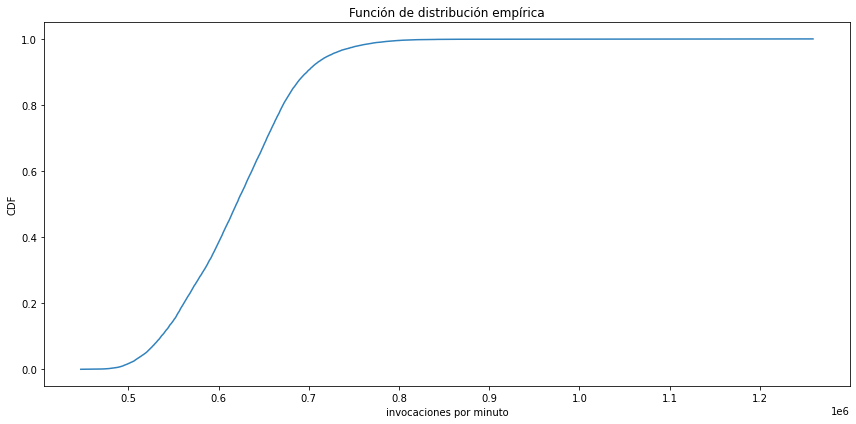

In [71]:
fig, ax = plt.subplots(figsize=(12, 6))
# Función de Distribución Acumulada
# ecdf (empirical cumulative distribution function)
ecdf = ECDF(x=inv_min['invocaciones'])
ax.plot(ecdf.x, ecdf.y, color="#3182bd")
ax.set_title('Función de distribución empírica')
ax.set_xlabel('invocaciones por minuto')
ax.set_ylabel('CDF')

plt.tight_layout();

In [73]:
print ("Coeficiente del Hurts para numero de invocacines por minuto de la plataforma: \n", hurst(serieT(inv_min.copy())))

Coeficiente del Hurts para numero de invocacines por minuto de la plataforma: 
 [0.08883646]


Como dato de análisis se usó el número de invocaciones por minuto que recibe la plataforma. Dado el coeficiente del hurts 0.0888, la serie de numero de invocaciones mantiene una dinámica de reversión a la media. Con una probabilidad del 90% a que el número de invocaciones en un minuto sea menor o igual a 700000. 

Coeficiente del Hurts para numero de invocacines por hora de la plataforma: 
 [0.11322122]


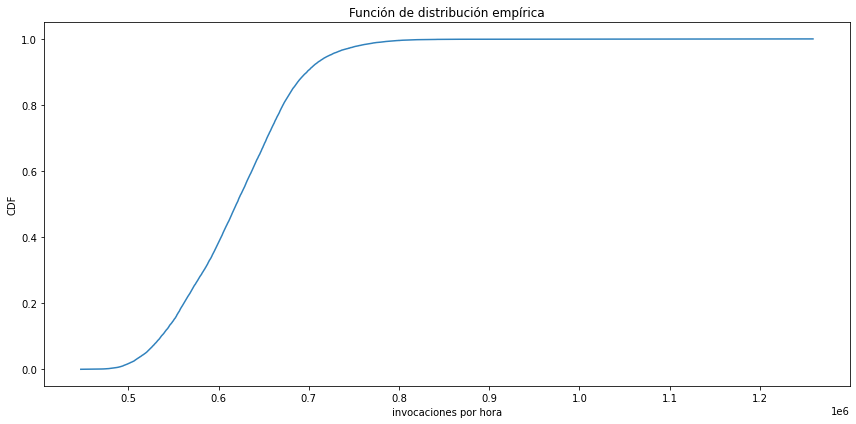

In [80]:
inv_hor = pd.read_csv(r"C:\Users\robin\Documents\dataset_Metodologia\Invocations_per_Hour.csv")
fig, ax = plt.subplots(figsize=(12, 6))
# Función de Distribución Acumulada
# ecdf (empirical cumulative distribution function)
ecdf = ECDF(x=inv_min['invocaciones'])
ax.plot(ecdf.x, ecdf.y, color="#3182bd")
ax.set_title('Función de distribución empírica')
ax.set_xlabel('invocaciones por hora')
ax.set_ylabel('CDF')
print ("Coeficiente del Hurts para numero de invocacines por hora de la plataforma: \n", hurst(serieT(inv_hor.copy())))
plt.tight_layout();

# Segunda Fase de preguntas 

Estadisticos de funciones event:
Coeficiente del Hurts: [0.03319735]
Coeficiente de variación:  0.15190986083726557
Rango:  211621
Desviación estandar:  30343.0422156351
Desviación absoluta media:  19658.385874806907


Estadisticos de funciones http:
Coeficiente del Hurts: [0.14212594]
Coeficiente de variación:  0.10469710148397422
Rango:  76909
Desviación estandar:  15192.789741728691
Desviación absoluta media:  12556.974122299598


Estadisticos de funciones orchestration:
Coeficiente del Hurts: [0.01967872]
Coeficiente de variación:  0.5490498690128761
Rango:  36168
Desviación estandar:  5961.895325340924
Desviación absoluta media:  4750.5743248456865


Estadisticos de funciones others:
Coeficiente del Hurts: [0.18535214]
Coeficiente de variación:  0.9690859871030197
Rango:  10333
Desviación estandar:  1810.5308119217984
Desviación absoluta media:  1474.7045061728359


Estadisticos de funciones queue:
Coeficiente del Hurts: [0.07877509]
Coeficiente de variación:  0.12031040271316232


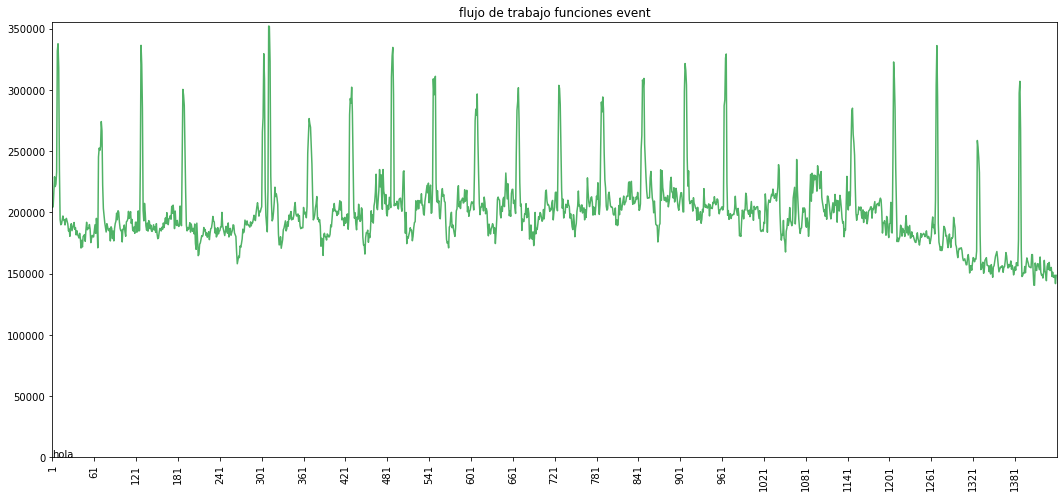

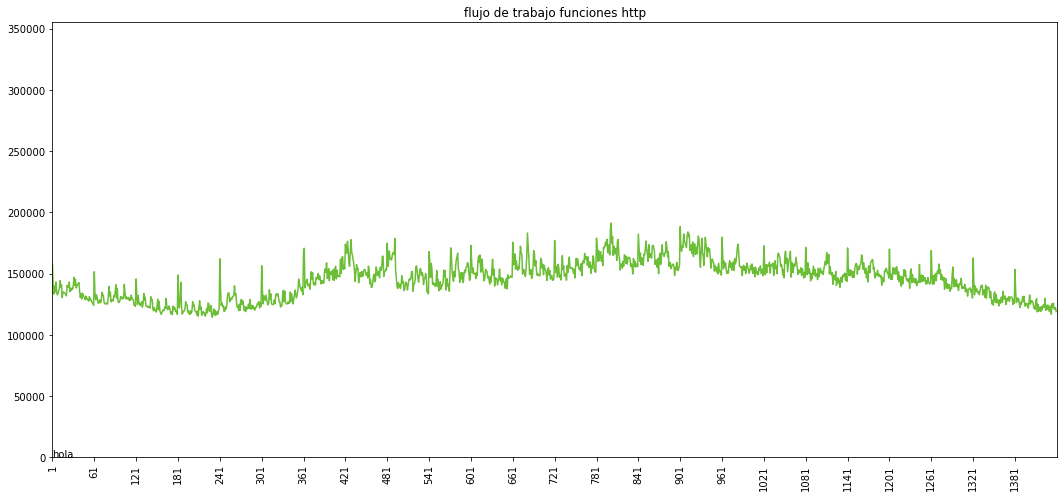

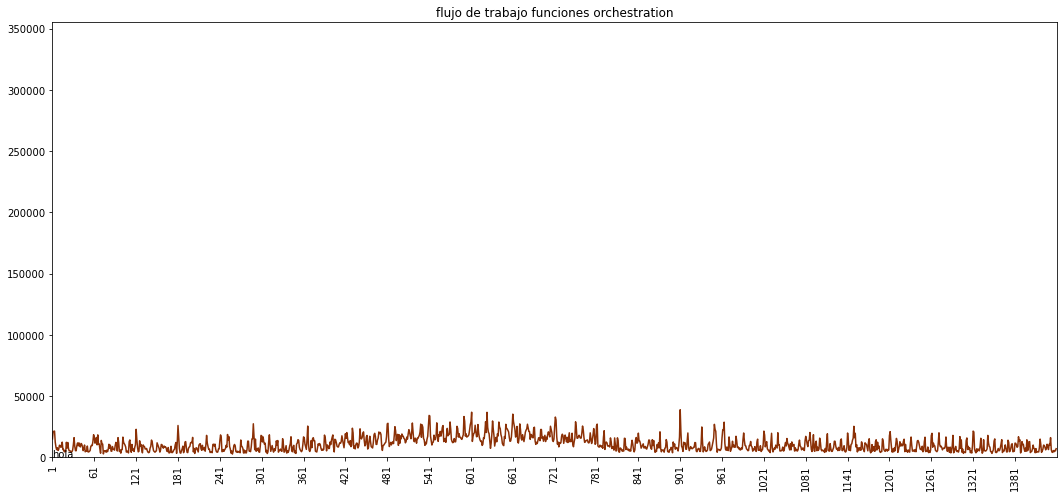

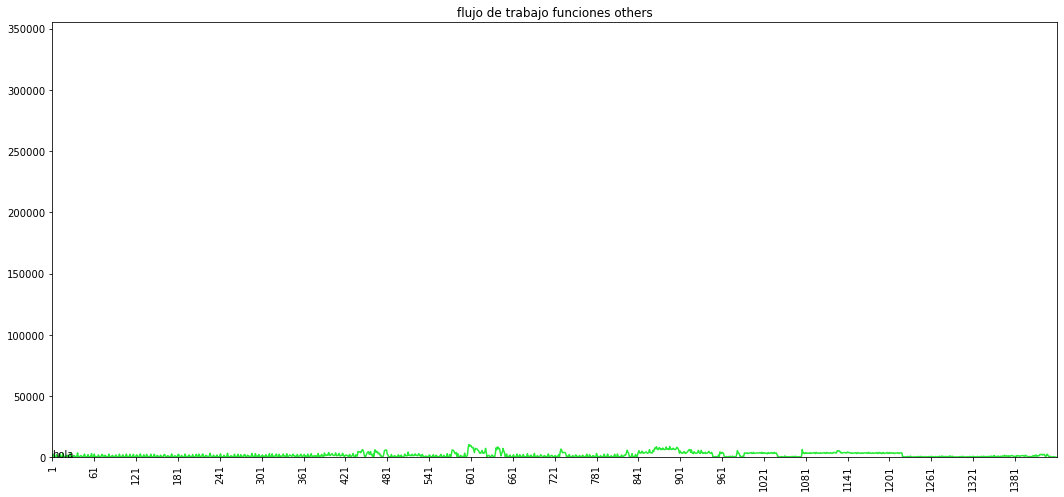

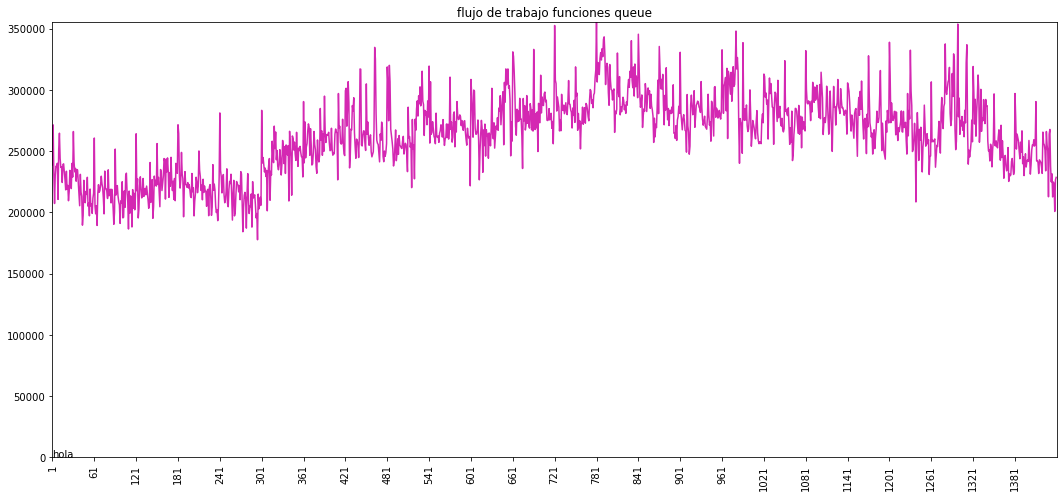

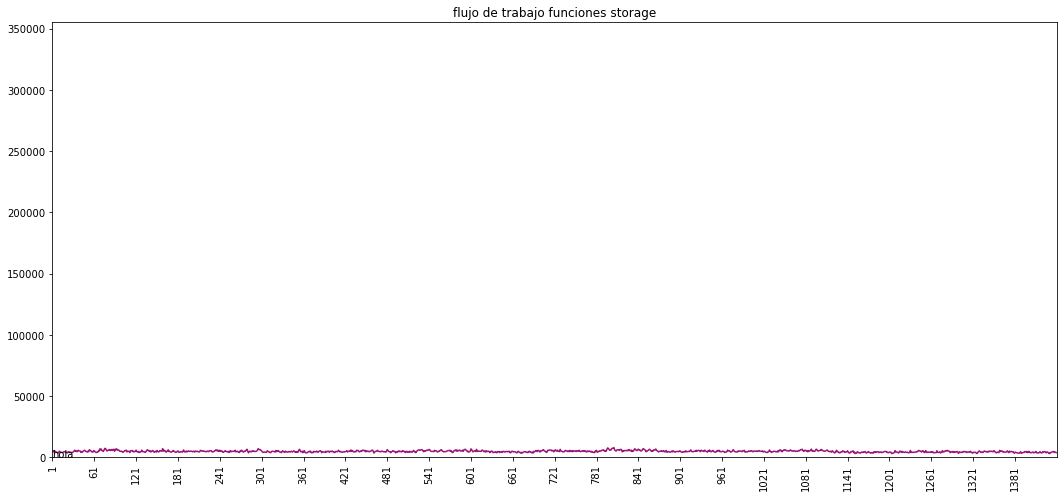

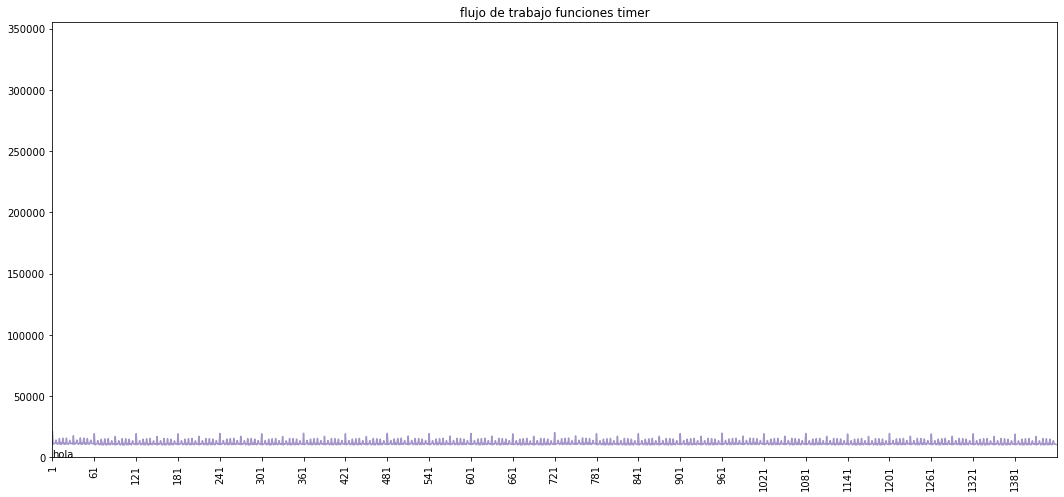

In [11]:
dia = pd.read_csv("invocations_per_function_md.anon.d05.csv")
dia.drop(['HashApp', 'HashOwner'], axis = 1, inplace=True)
dia.set_index('HashFunction',inplace=True)
grupos = dia.groupby('Trigger')
for key, item in grupos:
    ##print(key)
    #print(grupos.get_group(key).drop(['Trigger'], axis = 1), "\n\n")
    plt.figure(figsize=(18,8))
    r = rd.random() 
    b = rd.random() 
    g = rd.random() 
    color = (r, g, b) 
    
    plt.plot(grupos.get_group(key).drop(['Trigger'], axis = 1).sum(), c=color)
    plt.xlim(0, 1440)
    plt.ylim(0, 355000)
    plt.xticks(np.arange(0, 1440,60))
    #plt.xticks([x for x in range(0,1441) if x%60==0])
    plt.xticks(rotation=90)
    #estadisticos 
    print("Estadisticos de funciones "+str(key)+":")
    print ("Coeficiente del Hurts:", hurst(pd.DataFrame(grupos.get_group(key).drop(['Trigger'], axis = 1).sum())))
    print("Coeficiente de variación: ", cv(grupos.get_group(key).drop(['Trigger'], axis = 1).sum()))
    rango = grupos.get_group(key).drop(['Trigger'], axis = 1).sum().max() - grupos.get_group(key).drop(['Trigger'], axis = 1).sum().min()
    print("Rango: ", rango)
    print("Desviación estandar: ", np.std(grupos.get_group(key).drop(['Trigger'], axis = 1).sum()))
    print("Desviación absoluta media: ", grupos.get_group(key).drop(['Trigger'], axis = 1).sum().mad(axis = 0, skipna = True))
    print()
    print()
 
    plt.title("flujo de trabajo funciones " +str(key))
    plt.ion()
    

In [81]:
#cond = dia['Trigger']=="event" or dia['Trigger']=="queue"
dia[dia.Trigger.isin(["event","queue"])].shape

(8060, 1441)

estadisticos funciones event + queue: 
Coeficiente del Hurts:  [0.06444547]
Coeficiente de variación:  0.10292343690876757
Rango:  286698
desviación estandar :  47572.66308178041
Desviación absoluta media:  38352.943026620094


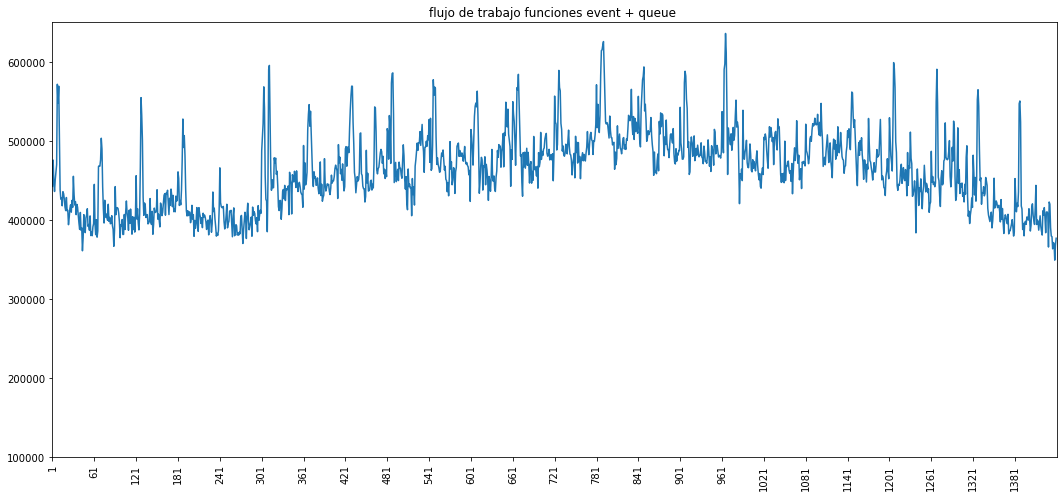

In [30]:
plt.figure(figsize=(18,8))

plt.plot(dia[dia.Trigger.isin(["event","queue"])].drop(['Trigger'], axis = 1).sum())
plt.xlim(0, 1440)
plt.ylim(100000, 650000)
plt.xticks(np.arange(0, 1440,60))
plt.xticks(rotation=90)
plt.title("flujo de trabajo funciones event + queue ")
print("estadisticos funciones event + queue: ")
print("Coeficiente del Hurts: ", hurst(pd.DataFrame(dia[dia.Trigger.isin(["event","queue"])].drop(['Trigger'], axis = 1).sum())))
print("Coeficiente de variación: ", cv(dia[dia.Trigger.isin(["event","queue"])].drop(['Trigger'], axis = 1).sum()))
rango = dia[dia.Trigger.isin(["event","queue"])].drop(['Trigger'], axis = 1).sum().max() - dia[dia.Trigger.isin(["event","queue"])].drop(['Trigger'], axis = 1).sum().min()
print("Rango: ", rango)
print("desviación estandar : ", np.std(dia[dia.Trigger.isin(["event","queue"])].drop(['Trigger'], axis = 1).sum()))
print("Desviación absoluta media: ", dia[dia.Trigger.isin(["event","queue"])].drop(['Trigger'], axis = 1).sum().mad(axis = 0, skipna = True))

plt.ion()

estadisticos funciones sin event y queue: 
Coeficiente del Hurts:  [0.07838215]
Coeficiente de variación:  0.11088154524892176
Rango:  123600
desviación estandar :  19329.488038518975
Desviación absoluta media:  15907.530447530877


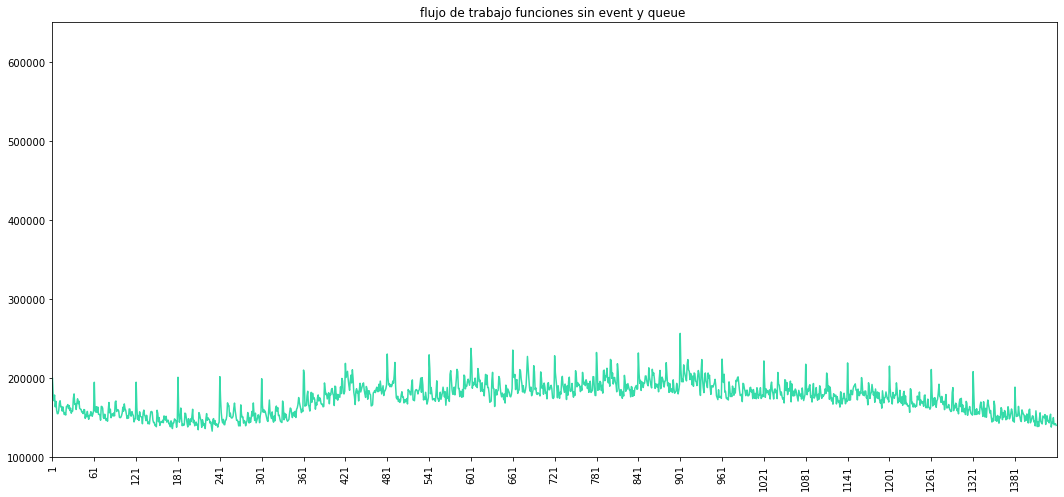

In [29]:
plt.figure(figsize=(18,8))

plt.plot(dia[~dia.Trigger.isin(["event","queue"])].drop(['Trigger'], axis = 1).sum(), '#35DBA9')
plt.xlim(0, 1440)
plt.ylim(100000, 650000)
plt.xticks(np.arange(0, 1440,60))
plt.xticks(rotation=90)
plt.title("flujo de trabajo funciones sin event y queue ")
print("estadisticos funciones sin event y queue: ")
print("Coeficiente del Hurts: ", hurst(pd.DataFrame(dia[~dia.Trigger.isin(["event","queue"])].drop(['Trigger'], axis = 1).sum())))
print("Coeficiente de variación: ",cv(dia[~dia.Trigger.isin(["event","queue"])].drop(['Trigger'], axis = 1).sum()))
rango = dia[~dia.Trigger.isin(["event","queue"])].drop(['Trigger'], axis = 1).sum().max() - dia[~dia.Trigger.isin(["event","queue"])].drop(['Trigger'], axis = 1).sum().min()
print("Rango: ", rango)
print("desviación estandar : ", np.std(dia[~dia.Trigger.isin(["event","queue"])].drop(['Trigger'], axis = 1).sum()))
print("Desviación absoluta media: ", dia[~dia.Trigger.isin(["event","queue"])].drop(['Trigger'], axis = 1).sum().mad(axis = 0, skipna = True))

plt.ion()

In [ ]:
#Para un día dado, para cada función, calcular el factor de autocorrelation y graficar el CDF 
#de los valores de autocorrelación.


In [71]:
##pd.Series.autocorr()
dia.drop(['Trigger'], axis = 1).apply(pd.Series.autocorr,axis=1)

HashFunction
520dbd6bd906840012aa0c4b778743efc7c0ac7b7caf96b3d7f85d46209b7872   -0.249674
115ca7a2b5bc290052c3da74cd0347d19c3c67b7d5aa66e9a975e427f25fc7ed   -0.250217
fa4f840d0cddc391a9afee2b15074f7f92bec15e7ea91641fa075ccee3be3068   -0.001392
93e6c664773bbec3a7f50a0e92fa7e97401a802dc6eed86ae062344eb0cb7c2e    0.030561
740c5c767e4b9978ee59a97d1829cfbaf755a47806a3114f0d4c182bb5a7e253   -0.011265
                                                                      ...   
d01feeef6c6a03ba8cc96dbfdcb8898106b18acbe9d100185182b218072e0e8b   -0.001392
d43df62e0448cf994831aba36a262443378c03993bbb7b9570dfa86c9ba9f8da    0.662444
f1ff5a83374938d5da346b909ae4c6aaf6488f575116c9936860ae86ebb9e0d6   -0.000695
d6a50fa610274244b42a39dcb31f28a699dc289ce5e7827fca931798074f3f63   -0.006294
3d8e7e07d617138e120d85a3d46013ff848fe5e34fcc4a45b1ceaf297327a0ee   -0.000695
Length: 46657, dtype: float64

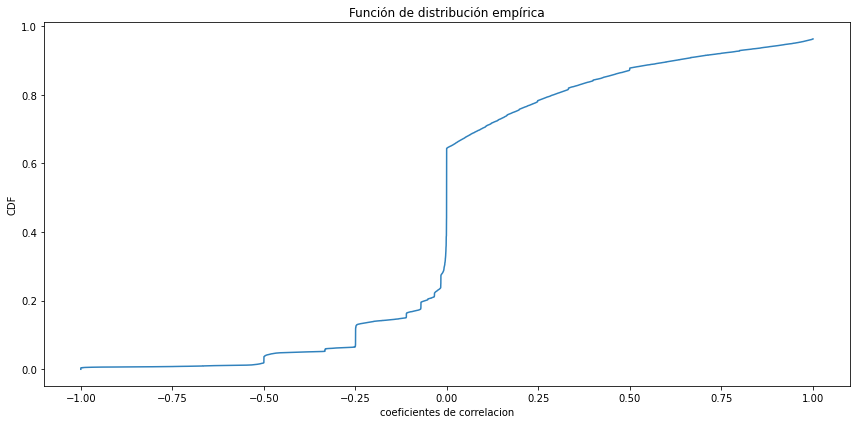

In [76]:
coeficientes = dia.drop(['Trigger'], axis = 1).apply(pd.Series.autocorr,axis=1)
fig, ax = plt.subplots(figsize=(12, 6))
ecdf = ECDF(x=coeficientes)
ax.plot(ecdf.x, ecdf.y, color="#3182bd")
ax.set_title('Función de distribución empírica')
ax.set_xlabel('coeficientes de correlacion')
ax.set_ylabel('CDF')
plt.tight_layout();

In [79]:
print("coeficiente del Hurst para en dia analizado :", hurst(pd.DataFrame(dia.drop(['Trigger'], axis = 1).sum())))

coeficiente del Hurst para en dia analizado : [0.07398442]


In [8]:
#para el uso en cada funcion del dia que analizamos 
rango = lambda x: np.amax(x) - np.amin(x)

In [9]:
dia_mad = dia.drop(['Trigger'], axis = 1).apply(pd.Series.mad,axis=1)
dia_cv = dia.drop(['Trigger'], axis = 1).apply(cv,axis=1)
dia_rango = dia.drop(['Trigger'], axis = 1).apply(rango,axis=1)
dia_std = dia.drop(['Trigger'], axis = 1).apply(np.std,axis=1)

In [10]:
funciones_analisis= pd.concat([dia_cv, dia_rango, dia_std, dia_mad], axis=1, keys=['Coefficient of variation','Range','Standard deviation', 'Mean Absolute Deviation'])
funciones_analisis.insert(0, "HashFunction", funciones_analisis.index)
funciones_analisis.reset_index(drop=True, inplace = True)
funciones_analisis.to_csv("Metricas_desviacion_Funciones.csv",index=False)
funciones_analisis

,HashFunction,Coefficient of variation,Range,Standard deviation,Mean Absolute Deviation
0,520dbd6bd906840012aa0c4b778743efc7c0ac7b7caf96...,2.000695,1,0.400000,0.320000
1,115ca7a2b5bc290052c3da74cd0347d19c3c67b7d5aa66...,2.000695,1,0.400000,0.320000
2,fa4f840d0cddc391a9afee2b15074f7f92bec15e7ea916...,26.823491,1,0.037242,0.002774
3,93e6c664773bbec3a7f50a0e92fa7e97401a802dc6eed8...,8.611245,2,0.125537,0.028762
4,740c5c767e4b9978ee59a97d1829cfbaf755a47806a311...,9.428234,3,0.150538,0.031523
...,...,...,...,...,...
46652,d01feeef6c6a03ba8cc96dbfdcb8898106b18acbe9d100...,26.823491,1,0.037242,0.002774
46653,d43df62e0448cf994831aba36a262443378c03993bbb7b...,8.891282,1,0.111102,0.024687
46654,f1ff5a83374938d5da346b909ae4c6aaf6488f575116c9...,37.947332,1,0.026343,0.001388
46655,d6a50fa610274244b42a39dcb31f28a699dc289ce5e782...,12.613901,1,0.078810,0.012422


In [43]:
funciones_analisis

,Coefficient of variation,Range,Standard deviation,Mean Absolute Deviation
HashFunction,,,,
520dbd6bd906840012aa0c4b778743efc7c0ac7b7caf96b3d7f85d46209b7872,2.000695,1,0.400000,0.320000
115ca7a2b5bc290052c3da74cd0347d19c3c67b7d5aa66e9a975e427f25fc7ed,2.000695,1,0.400000,0.320000
fa4f840d0cddc391a9afee2b15074f7f92bec15e7ea91641fa075ccee3be3068,26.823491,1,0.037242,0.002774
93e6c664773bbec3a7f50a0e92fa7e97401a802dc6eed86ae062344eb0cb7c2e,8.611245,2,0.125537,0.028762
740c5c767e4b9978ee59a97d1829cfbaf755a47806a3114f0d4c182bb5a7e253,9.428234,3,0.150538,0.031523
...,...,...,...,...
d01feeef6c6a03ba8cc96dbfdcb8898106b18acbe9d100185182b218072e0e8b,26.823491,1,0.037242,0.002774
d43df62e0448cf994831aba36a262443378c03993bbb7b9570dfa86c9ba9f8da,8.891282,1,0.111102,0.024687
f1ff5a83374938d5da346b909ae4c6aaf6488f575116c9936860ae86ebb9e0d6,37.947332,1,0.026343,0.001388


In [49]:
# valores max por columnas 
funciones_analisis.max(axis = 0)

Coefficient of variation        37.947332
Range                       161699.000000
Standard deviation           24836.375657
Mean Absolute Deviation      13356.369699
dtype: float64

In [51]:
#ids de funciones con valores maximos por columnas 
funciones_analisis.idxmax()

Coefficient of variation    8146164b4f1a11c06d76213051499f2f65622b96b82be2...
Range                       660323aa6f1012c8eca3c7d8153cb436320b48ed84f82b...
Standard deviation          660323aa6f1012c8eca3c7d8153cb436320b48ed84f82b...
Mean Absolute Deviation     660323aa6f1012c8eca3c7d8153cb436320b48ed84f82b...
dtype: object

In [97]:
funciones_analisis.idxmax()[0]

'660323aa6f1012c8eca3c7d8153cb436320b48ed84f82bf3e816b494ad8dfde2'

8146164b4f1a11c06d76213051499f2f65622b96b82be2d891ddb0e37f0f9968
funcion con CV máximo tipo:  queue


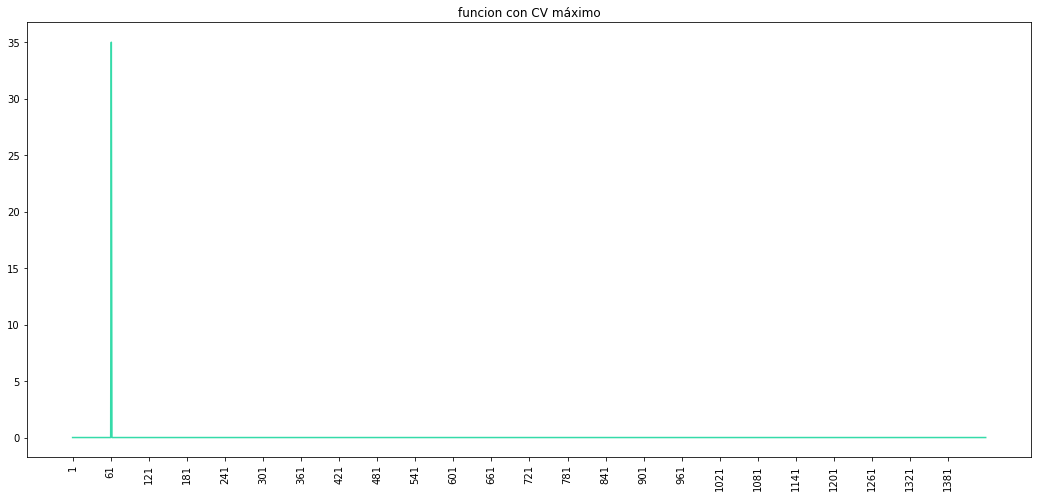

In [115]:
# funcion con CV maximo 
print(funciones_analisis.idxmax()[0])
print('funcion con CV máximo tipo: ',dia.loc[funciones_analisis.idxmax()[0]]['Trigger'])
plt.figure(figsize=(18,8))

plt.plot(dia.loc[funciones_analisis.idxmax()[0]].drop(['Trigger']), '#35DBA9')
#plt.xlim(0, 1440)
#plt.ylim(100000, 650000)
plt.xticks(np.arange(0, 1440,60))
plt.xticks(rotation=90)
plt.title("funcion con CV máximo")
plt.ion()

660323aa6f1012c8eca3c7d8153cb436320b48ed84f82bf3e816b494ad8dfde2
funcion de tipo:  event


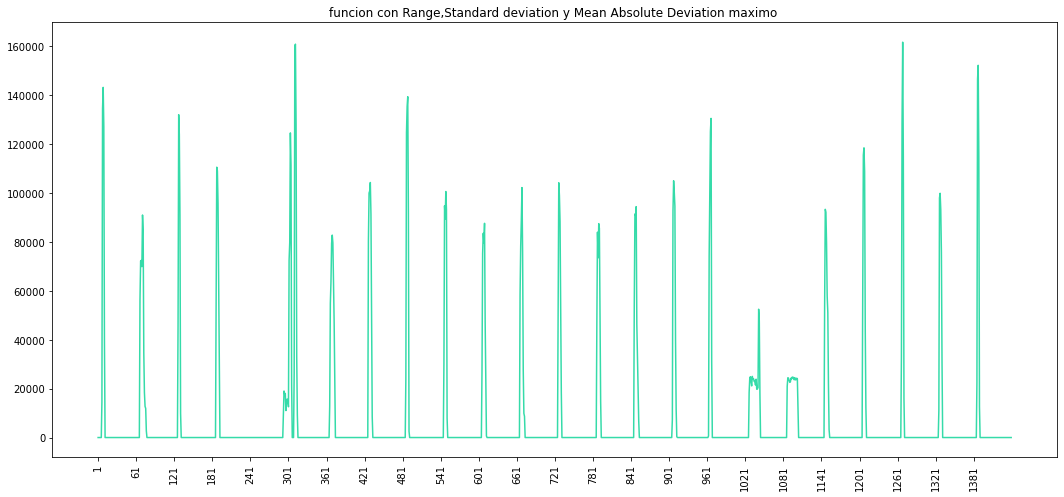

In [116]:
# funcion con Range,Standard deviation y Mean Absolute Deviation maximo 
print(funciones_analisis.idxmax()[1])
print('funcion de tipo: ',dia.loc[funciones_analisis.idxmax()[1]]['Trigger'])
plt.figure(figsize=(18,8))

plt.plot(dia.loc[funciones_analisis.idxmax()[2]].drop(['Trigger']), '#35DBA9')
#plt.xlim(0, 1440)
#plt.ylim(100000, 650000)
plt.xticks(np.arange(0, 1440,60))
plt.xticks(rotation=90)
plt.title("funcion con Range,Standard deviation y Mean Absolute Deviation maximo ")
plt.ion()